# Data Anaylsis

## 1. Import Libraries & Data

### Import Libraries/Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

%matplotlib inline

sns.set_style('ticks')

In [2]:
df = pd.read_csv('./clean_data/merged_tables.csv', low_memory=False)

/Users/rezarad/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df = df.drop('Unnamed: 0', axis=1)
df = df.dropna()

In [4]:
df['DATETIME_MTA'] = pd.to_datetime(df['DATETIME_MTA'], format='%Y-%m-%d %H:%M:%S')
df = df.loc[df['DATETIME_MTA'] >= pd.datetime(2017, 1, 1)]

In [5]:
df['DAY'] = df['DATETIME_MTA'].apply(lambda x: x.dayofyear)
df['HOUR'] = df['DATETIME_MTA'].apply(lambda x: x.hour)
df['DAYOFWEEK'] = df['DATETIME_MTA'].apply(lambda x: x.dayofweek)

In [6]:
df.loc[df['HOURLYPrecip'] == 0, 'Precip_Severity'] = 0
df.loc[(df['HOURLYPrecip'] > 0) & (df['HOURLYPrecip'] <= 0.05), 'Precip_Severity'] = 1
df.loc[df['HOURLYPrecip'] > 0.05, 'Precip_Severity'] = 2

In [7]:
df.dtypes

LINENAME                    object
STATION_MTA                 object
DATETIME_MTA        datetime64[ns]
ENTRIES                      int64
EXITS                        int64
GTFS Latitude              float64
GTFS Longitude             float64
STATION_WEATHER             object
STATION_NAME                object
LATITUDE                   float64
LONGITUDE                  float64
DATETIME_WEATHER            object
HOURLYPrecip               float64
DAY                          int64
HOUR                         int64
DAYOFWEEK                    int64
Precip_Severity            float64
dtype: object

In [8]:
df.shape

(6007096, 17)

In [9]:
df.columns

Index([u'LINENAME', u'STATION_MTA', u'DATETIME_MTA', u'ENTRIES', u'EXITS',
       u'GTFS Latitude', u'GTFS Longitude', u'STATION_WEATHER',
       u'STATION_NAME', u'LATITUDE', u'LONGITUDE', u'DATETIME_WEATHER',
       u'HOURLYPrecip', u'DAY', u'HOUR', u'DAYOFWEEK', u'Precip_Severity'],
      dtype='object')

In [10]:
df_by_day_hr = df.groupby(['LINENAME', 'STATION_MTA', 'DAY', 'HOUR']).agg([np.mean, np.sum])

In [11]:
df_by_day_hr.head()

ENTRIES         EXITS       GTFS Latitude  \
                                 mean    sum   mean   sum          mean   
LINENAME STATION_MTA DAY HOUR                                             
1        103 ST      1   0      100.0   2700  140.0  3780     40.795379   
                         4       38.0   1710   32.0  1440     40.795379   
                         8      227.0   6129   69.0  1863     40.795379   
                         12     370.0   9990  136.0  3672     40.795379   
                         16     304.0  13680  196.0  8820     40.795379   

                                           GTFS Longitude               \
                                       sum           mean          sum   
LINENAME STATION_MTA DAY HOUR                                            
1        103 ST      1   0     1101.475242     -73.959104 -1996.895799   
                         4     1835.792070     -73.959104 -3328.159665   
                         8     1101.475242     -73.959104 -1996.895799   
                         12    1101.475242     -73.959104 -1996.895799   
                         16    1835.792070     -73.959104 -3328.159665   

                                LATITUDE            LONGITUDE             \
                                    mean        sum      mean        sum   
LINENAME STATION_MTA DAY HOUR                                              
1        103 ST      1   0     40.735567  1099.8603 -73.86970 -1994.4819   
                         4     40.724900  1832.6205 -73.85026 -3323.2617   
                         8     40.735567  1099.8603 -73.86970 -1994.4819   
                         12    40.735567  1099.8603 -73.86970 -1994.4819   
                         16    40.724900  1832.6205 -73.85026 -3323.2617   

                              HOURLYPrecip       DAYOFWEEK       \
                                      mean   sum      mean  sum   
LINENAME STATION_MTA DAY HOUR                                     
1        103 ST      1   0        0.016667  0.45         6  162   
                         4        0.000000  0.00         6  270   
                         8        0.000000  0.00         6  162   
                         12       0.000000  0.00         6  162   
                         16       0.000000  0.00         6  270   

                              Precip_Severity       
                                         mean  sum  
LINENAME STATION_MTA DAY HOUR                       
1        103 ST      1   0           0.333333  9.0  
                         4           0.000000  0.0  
                         8           0.000000  0.0  
                         12          0.000000  0.0  
                         16          0.000000  0.0

## 2. Data Exploration

### Plotting Distribution by Precipitation Totals

In [10]:
gb_line_day_of_week = df.loc[:, ['LINENAME', 'DAYOFWEEK', 'ENTRIES', 'EXITS']].groupby(['LINENAME', 'DAYOFWEEK']).mean()

In [11]:
entries_by_line = gb_line_day_of_week['ENTRIES'].unstack()
exits_by_line = gb_line_day_of_week['EXITS'].unstack()

/Users/rezarad/anaconda2/lib/python2.7/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


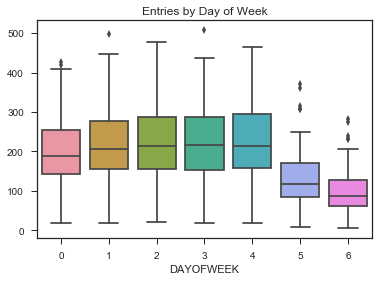

In [12]:
plt.figure()
plt.title('Entries by Day of Week')
sns.boxplot(entries_by_line)
plt.show()

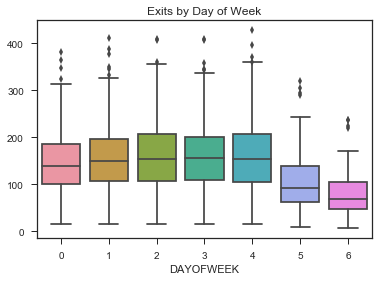

In [13]:
plt.figure()
plt.title('Exits by Day of Week')
sns.boxplot(exits_by_line)
plt.show()

In [19]:

df_by_line = df.loc[:, ['LINENAME', 'ENTRIES', 'EXITS']]


In [20]:
df_by_line.shape

(300354, 3)

In [11]:
gb_line = df.loc[:, ['LINENAME', 'ENTRIES', 'EXITS']].groupby(['LINENAME']).mean()

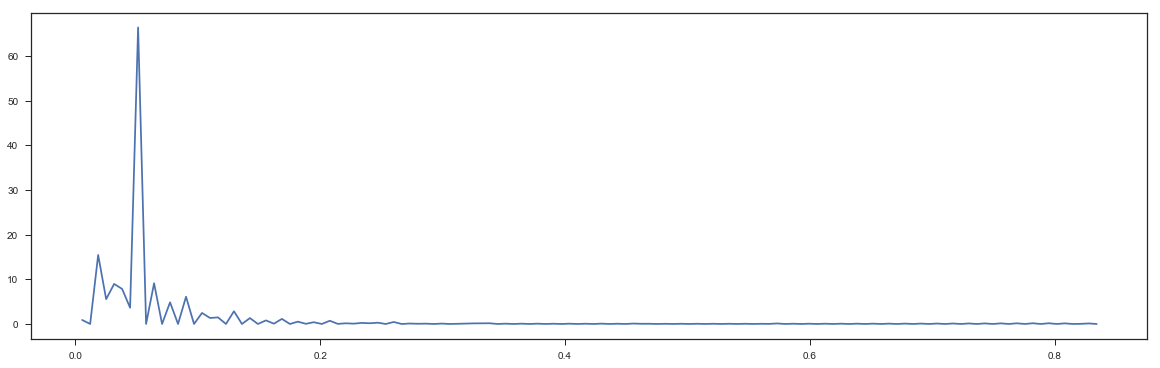

In [32]:
plt.figure(figsize=(20,6))
sns.distplot(precip['HOURLYPrecip'].values, hist=False)
plt.show()

In [46]:
no_precip = df.loc[df['HOURLYPrecip'] == 0]
low_precip = df.loc[(df['HOURLYPrecip'] > 0) & (df['HOURLYPrecip'] <= 0.05)]
high_precip = df.loc[df['HOURLYPrecip'] > 0.05]

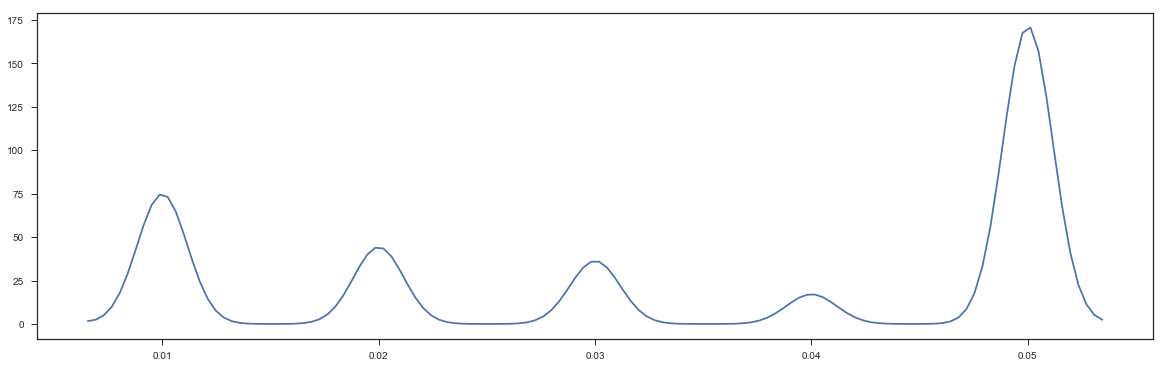

In [47]:
plt.figure(figsize=(20,6))
sns.distplot(low_precip['HOURLYPrecip'].values, hist=False)
plt.show()

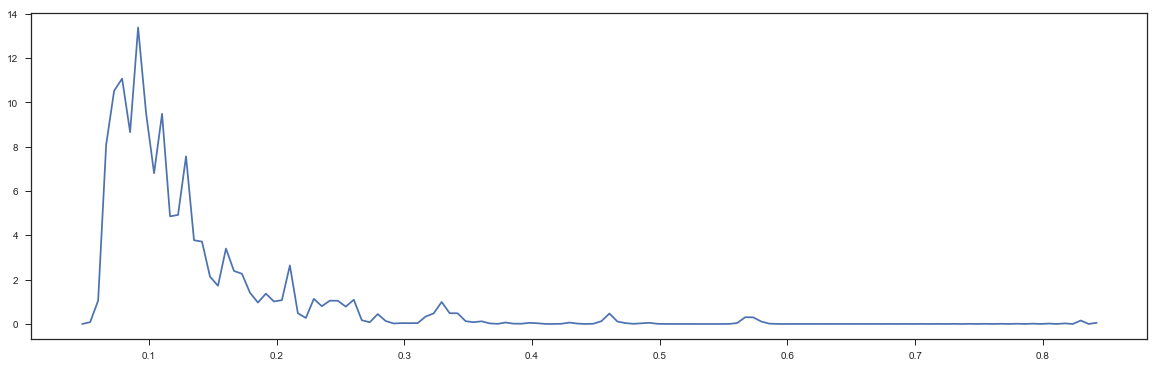

In [48]:
plt.figure(figsize=(20,6))
sns.distplot(high_precip['HOURLYPrecip'].values, hist=False)
plt.show()

In [12]:
print 'With Precipitation:\n{0}'.format(df.loc[df['HOURLYPrecip'] > 0, ['ENTRIES', 'EXITS']].agg([np.mean, np.std]))
print 'Without Precipitation:\n{0}'.format(df.loc[df['HOURLYPrecip'] == 0, ['ENTRIES', 'EXITS']].agg([np.mean, np.std]))

With Precipitation:
         ENTRIES       EXITS
mean  188.761356  141.613214
std   215.734354  174.362745
Without Precipitation:
         ENTRIES       EXITS
mean  180.857869  136.764057
std   223.012668  179.551911


In [66]:
print 'No Precipitation:\n{0}'.format(df.loc[df['Precip_Severity'] == 0, ['ENTRIES', 'EXITS']].agg([np.mean, np.std]))
print 'Low Precipitation:\n{0}'.format(df.loc[df['Precip_Severity'] == 1, ['ENTRIES', 'EXITS']].agg([np.mean, np.std]))
print 'High Precipitation:\n{0}'.format(df.loc[df['Precip_Severity'] == 2, ['ENTRIES', 'EXITS']].agg([np.mean, np.std]))

No Precipitation:
         ENTRIES       EXITS
mean  180.857869  136.764057
std   223.012668  179.551911
Low Precipitation:
         ENTRIES       EXITS
mean  192.040668  143.715197
std   214.851419  174.474800
High Precipitation:
         ENTRIES       EXITS
mean  174.848146  132.695083
std   218.895705  173.604116


There seems to be a slight decrease in ridership when theres 'precipitation' vs. 'no precipitation'. Let's explore whether there's a relationship dependent on the amount of precipitation.

#### Grouping the Data by the Hour

In [70]:
gb_day_hr = df.loc[:, ['DAY', 'HOUR', 'Precip_Severity', 'HOURLYPrecip', 'ENTRIES', 'EXITS']].groupby(['DAY','HOUR']).mean()

In [71]:
hourly_precip = gb_day_hr['Precip_Severity'].values.tolist()
avg_entries = gb_day_hr['ENTRIES'].values.tolist()
avg_exits = gb_day_hr['EXITS'].values.tolist()

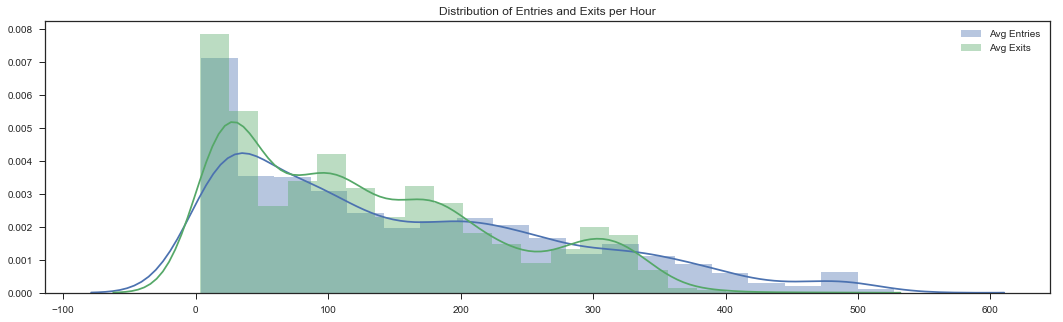

In [72]:
plt.figure(figsize=(18,5))
sns.distplot(avg_entries)
sns.distplot(avg_exits)
plt.title('Distribution of Entries and Exits per Hour')
plt.legend(['Avg Entries', "Avg Exits"])
plt.show()